In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

In [3]:
# loading data
data=pd.read_csv('high_diamond_ranked_10min.csv')

In [4]:
print(data.head)

<bound method NDFrame.head of           gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  \
0     4519157822         0               28                   2   
1     4523371949         0               12                   1   
2     4521474530         0               15                   0   
3     4524384067         0               43                   1   
4     4436033771         0               75                   4   
...          ...       ...              ...                 ...   
9874  4527873286         1               17                   2   
9875  4527797466         1               54                   0   
9876  4527713716         0               23                   1   
9877  4527628313         0               14                   4   
9878  4523772935         1               18                   0   

      blueFirstBlood  blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
0                  1          9           6           11                  0   
1      

Using Adaboost Model

Standardized Ratio: -0.0019232715861929345
Cross-validation accuracy: 0.7207389971096646
Training Accuracy: 0.7341515880045553
Test Accuracy: 0.7267206477732794


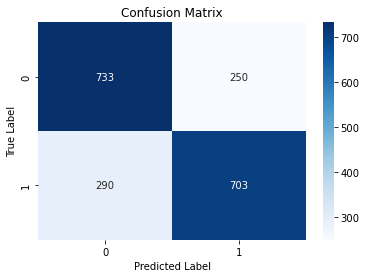

In [20]:
dataset=pd.read_csv('high_diamond_ranked_10min.csv')
dataset = dataset.drop_duplicates()

# assuming 'blueWins' is the target variable
X = dataset.drop('blueWins', axis=1)
y = dataset['blueWins']

# standardizing features
scaler = StandardScaler()
X = scaler.fit_transform(X)

blue_wins_count = np.sum(y == 1)
red_wins_count = np.sum(y == 0)

# calculating standardized ratio
standardized_ratio = (blue_wins_count - red_wins_count) / (blue_wins_count + red_wins_count)
print("Standardized Ratio:", standardized_ratio)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# cross validation
cross_val_accuracy = cross_val_score(adaboost_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy:", np.mean(cross_val_accuracy))

adaboost_model.fit(X_train, y_train)

y_pred_train = adaboost_model.predict(X_train)
y_pred_test = adaboost_model.predict(X_test)

# calculating accuracy
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Training Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)

# displaying confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()